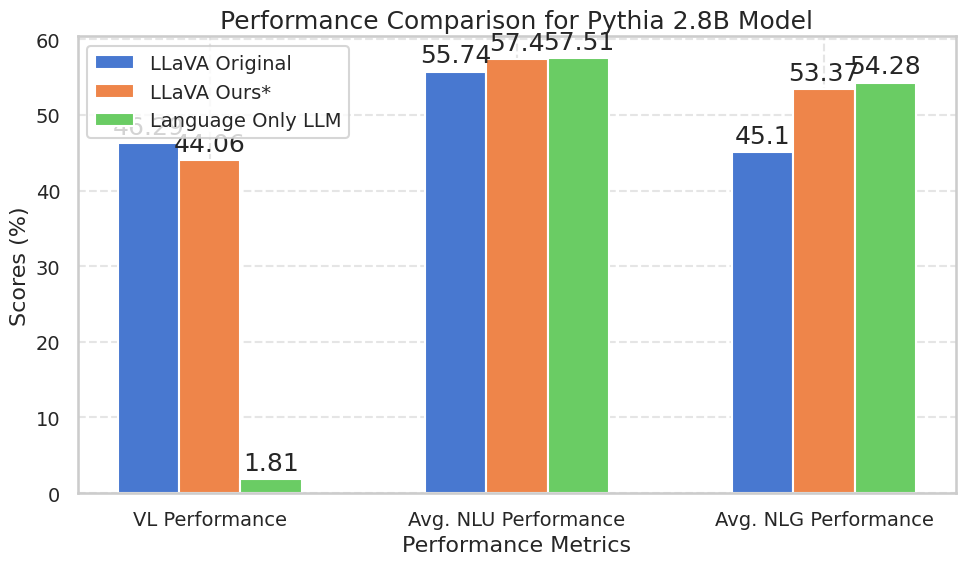

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.figsize': [10, 6],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

# Load the JSON data from the file
with open('results_A.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Define model scale to model name mapping for Pythia 2.8B model
model_scale = 2.8

llava_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b"
}

our_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b-soft"
}

base_llm_mapping = {
    model_scale: "reproduction-align-pythia+2p8b"
}

# Filter and categorize models
filtered_results = {
    'our_method': {},
    'llava_method': {},
    'base_llm': {}
}

for model_name, metrics in results.items():
    if model_name.endswith('soft'):
        filtered_results['our_method'][model_name] = metrics
    elif 'reproduction-align' in model_name:
        filtered_results['base_llm'][model_name] = metrics
    elif 'stage-final-llava-v15-pythia+' in model_name and 'soft' not in model_name:
        filtered_results['llava_method'][model_name] = metrics

# Calculate average performances
def calculate_performance(metrics, datasets):
    performances = {}
    for model, data in metrics.items():
        scores = [data.get(dataset, np.nan) * 100 for dataset in datasets]
        valid_scores = [score for score in scores if not np.isnan(score)]
        performances[model] = np.mean(valid_scores) if valid_scores else np.nan
    return performances

# VL performance
vl_performance_our = calculate_performance(filtered_results['our_method'], vl_datasets)
vl_performance_llava = calculate_performance(filtered_results['llava_method'], vl_datasets)
vl_performance_base = calculate_performance(filtered_results['base_llm'], vl_datasets)

# NLU performance
nlu_performance_our = calculate_performance(filtered_results['our_method'], nlu_datasets)
nlu_performance_llava = calculate_performance(filtered_results['llava_method'], nlu_datasets)
nlu_performance_base = calculate_performance(filtered_results['base_llm'], nlu_datasets)

# NLG performance
nlg_performance_our = calculate_performance(filtered_results['our_method'], nlg_datasets)
nlg_performance_llava = calculate_performance(filtered_results['llava_method'], nlg_datasets)
nlg_performance_base = calculate_performance(filtered_results['base_llm'], nlg_datasets)

# Prepare data for the bar chart
categories = ['VL Performance', 'Avg. NLU Performance', 'Avg. NLG Performance']
llava_scores = [
    vl_performance_llava[llava_mapping[model_scale]],
    nlu_performance_llava[llava_mapping[model_scale]],
    nlg_performance_llava[llava_mapping[model_scale]]
]
our_scores = [
    vl_performance_our[our_mapping[model_scale]],
    nlu_performance_our[our_mapping[model_scale]],
    nlg_performance_our[our_mapping[model_scale]]
]
base_scores = [
    vl_performance_base[base_llm_mapping[model_scale]],
    nlu_performance_base[base_llm_mapping[model_scale]],
    nlg_performance_base[base_llm_mapping[model_scale]]
]

# Plotting the bar chart
x = np.arange(len(categories))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, llava_scores, width, label='LLaVA Original', color=sns.color_palette("muted")[0])
rects2 = ax.bar(x, our_scores, width, label='LLaVA Ours*', color=sns.color_palette("muted")[1])
rects3 = ax.bar(x + width, base_scores, width, label='Language Only LLM', color=sns.color_palette("muted")[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Performance Metrics')
ax.set_ylabel('Scores (%)')
ax.set_title('Performance Comparison for Pythia 2.8B Model')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.savefig('pythia_2p8b_performance_comparison.png')
plt.show()

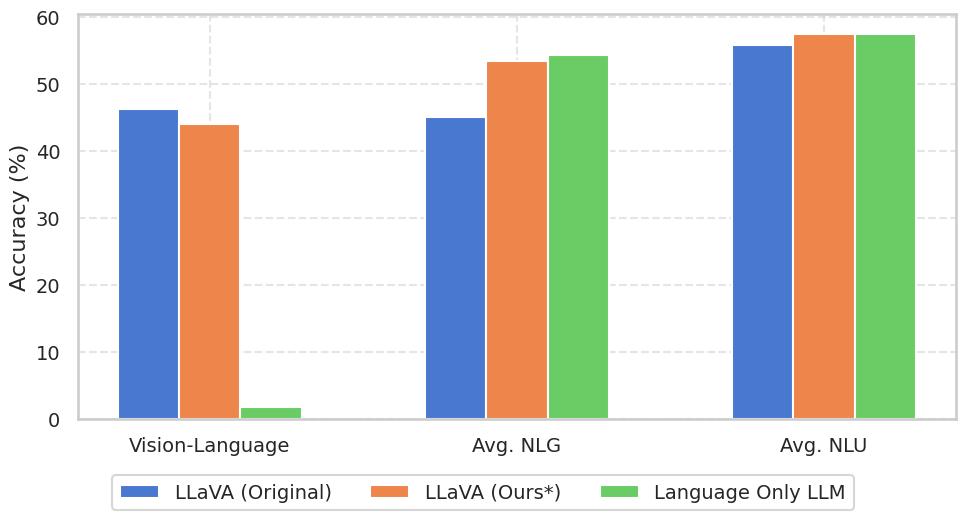

In [41]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.figsize': [8, 6],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

# Load the JSON data from the file
with open('results_A.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Define model scale to model name mapping for Pythia 2.8B model
model_scale = 2.8

llava_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b"
}

our_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b-soft"
}

base_llm_mapping = {
    model_scale: "reproduction-align-pythia+2p8b"
}

# Filter and categorize models
filtered_results = {
    'our_method': {},
    'llava_method': {},
    'base_llm': {}
}

for model_name, metrics in results.items():
    if model_name.endswith('soft'):
        filtered_results['our_method'][model_name] = metrics
    elif 'reproduction-align' in model_name:
        filtered_results['base_llm'][model_name] = metrics
    elif 'stage-final-llava-v15-pythia+' in model_name and 'soft' not in model_name:
        filtered_results['llava_method'][model_name] = metrics

# Calculate average performances
def calculate_performance(metrics, datasets):
    performances = {}
    for model, data in metrics.items():
        scores = [data.get(dataset, np.nan) * 100 for dataset in datasets]
        valid_scores = [score for score in scores if not np.isnan(score)]
        performances[model] = np.mean(valid_scores) if valid_scores else np.nan
    return performances

# VL performance
vl_performance_our = calculate_performance(filtered_results['our_method'], vl_datasets)
vl_performance_llava = calculate_performance(filtered_results['llava_method'], vl_datasets)
vl_performance_base = calculate_performance(filtered_results['base_llm'], vl_datasets)

# NLU performance
nlu_performance_our = calculate_performance(filtered_results['our_method'], nlu_datasets)
nlu_performance_llava = calculate_performance(filtered_results['llava_method'], nlu_datasets)
nlu_performance_base = calculate_performance(filtered_results['base_llm'], nlu_datasets)

# NLG performance
nlg_performance_our = calculate_performance(filtered_results['our_method'], nlg_datasets)
nlg_performance_llava = calculate_performance(filtered_results['llava_method'], nlg_datasets)
nlg_performance_base = calculate_performance(filtered_results['base_llm'], nlg_datasets)

# Prepare data for the bar chart
categories = ['Vision-Language','Avg. NLG', 'Avg. NLU']
llava_scores = [
    vl_performance_llava[llava_mapping[model_scale]],
    nlg_performance_llava[llava_mapping[model_scale]],
    nlu_performance_llava[llava_mapping[model_scale]],
]
our_scores = [
    vl_performance_our[our_mapping[model_scale]],
    nlg_performance_our[our_mapping[model_scale]],
    nlu_performance_our[our_mapping[model_scale]],
]
base_scores = [
    vl_performance_base[base_llm_mapping[model_scale]],
    nlg_performance_base[base_llm_mapping[model_scale]],
    nlu_performance_base[base_llm_mapping[model_scale]],
]

# Plotting the bar chart
x = np.arange(len(categories))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width, llava_scores, width, label='LLaVA (Original)', color=sns.color_palette("muted")[0])
rects2 = ax.bar(x, our_scores, width, label='LLaVA (Ours*)', color=sns.color_palette("muted")[1])
rects3 = ax.bar(x + width, base_scores, width, label='Language Only LLM', color=sns.color_palette("muted")[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_xlabel('Performance Metrics')
ax.set_ylabel('Accuracy (%)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
# Combine the legends
fig.legend(handles=[rects1, rects2, rects3],
           labels=['LLaVA (Original)', 'LLaVA (Ours*)', 'Language Only LLM'], loc='lower center', bbox_to_anchor=(0.5, -0.075), ncol=3)

# # Ensure labels are correctly placed
# def autolabel(rects):
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(round(height, 2)),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)

# Adjust layout to ensure everything fits
fig.tight_layout()
#plt.subplots_adjust(bottom=0.35, top=0.95, right=0.95, left=0.1)  # Adjust the padding as needed
plt.savefig('main_figure.png')
plt.show()

import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.figsize': [8, 6],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

# Load the JSON data from the file
with open('results_A.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Define model scale to model name mapping for Pythia 2.8B model
model_scale = 2.8

llava_mapping = {
    model_scale: "stage-final-llava-v15-phi2+3b-repeat"
}

our_mapping = {
    model_scale: "stage-final-llava-v15-phi2+3b-soft"
}

base_llm_mapping = {
    model_scale: "reproduction-align-phi2+3b"
}

# Filter and categorize models
filtered_results = {
    'our_method': {},
    'llava_method': {},
    'base_llm': {}
}

for model_name, metrics in results.items():
    if model_name.endswith('soft'):
        filtered_results['our_method'][model_name] = metrics
    elif 'reproduction-align' in model_name:
        filtered_results['base_llm'][model_name] = metrics
    elif 'stage-final-llava-v15-pythia+' in model_name and 'soft' not in model_name:
        filtered_results['llava_method'][model_name] = metrics
    elif 'stage-final-llava-v15-phi2+' in model_name and 'soft' not in model_name:
        filtered_results['llava_method'][model_name] = metrics

# Calculate average performances
def calculate_performance(metrics, datasets):
    performances = {}
    for model, data in metrics.items():
        scores = [data.get(dataset, np.nan) * 100 for dataset in datasets]
        valid_scores = [score for score in scores if not np.isnan(score)]
        performances[model] = np.mean(valid_scores) if valid_scores else np.nan
    return performances

# VL performance
vl_performance_our = calculate_performance(filtered_results['our_method'], vl_datasets)
vl_performance_llava = calculate_performance(filtered_results['llava_method'], vl_datasets)
vl_performance_base = calculate_performance(filtered_results['base_llm'], vl_datasets)

# NLU performance
nlu_performance_our = calculate_performance(filtered_results['our_method'], nlu_datasets)
nlu_performance_llava = calculate_performance(filtered_results['llava_method'], nlu_datasets)
nlu_performance_base = calculate_performance(filtered_results['base_llm'], nlu_datasets)

# NLG performance
nlg_performance_our = calculate_performance(filtered_results['our_method'], nlg_datasets)
nlg_performance_llava = calculate_performance(filtered_results['llava_method'], nlg_datasets)
nlg_performance_base = calculate_performance(filtered_results['base_llm'], nlg_datasets)

# Prepare data for the bar chart
categories = ['Vision-Language','Avg. NLG', 'Avg. NLU']
llava_scores = [
    vl_performance_llava[llava_mapping[model_scale]],
    nlg_performance_llava[llava_mapping[model_scale]],
    nlu_performance_llava[llava_mapping[model_scale]],
]
our_scores = [
    vl_performance_our[our_mapping[model_scale]],
    nlg_performance_our[our_mapping[model_scale]],
    nlu_performance_our[our_mapping[model_scale]],
]
base_scores = [
    vl_performance_base[base_llm_mapping[model_scale]],
    nlg_performance_base[base_llm_mapping[model_scale]],
    nlu_performance_base[base_llm_mapping[model_scale]],
]

# Plotting the bar chart
x = np.arange(len(categories))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width, llava_scores, width, label='LLaVA (Original)', color=sns.color_palette("muted")[0])
rects2 = ax.bar(x, our_scores, width, label='LLaVA (Ours*)', color=sns.color_palette("muted")[1])
rects3 = ax.bar(x + width, base_scores, width, label='Language Only LLM', color=sns.color_palette("muted")[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_xlabel('Performance Metrics')
ax.set_ylabel('Accuracy (%)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
# Combine the legends
fig.legend(handles=[rects1, rects2, rects3],
           labels=['LLaVA (Original)', 'LLaVA (Ours*)', 'Language Only LLM'], loc='lower center', bbox_to_anchor=(0.5, -0.075), ncol=3)

# # Ensure labels are correctly placed
# def autolabel(rects):
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(round(height, 2)),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)

# Adjust layout to ensure everything fits
fig.tight_layout()
#plt.subplots_adjust(bottom=0.35, top=0.95, right=0.95, left=0.1)  # Adjust the padding as needed
plt.savefig('main_figure.png')
plt.show()